Dataset Preview:
         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.

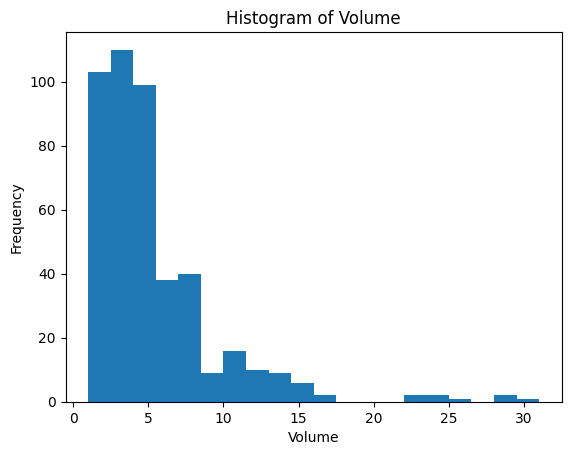

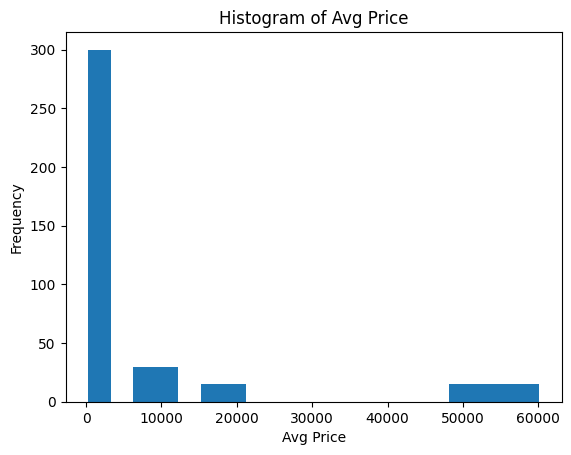

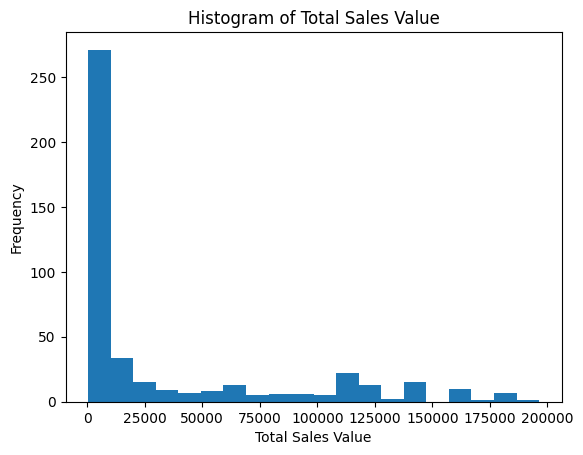

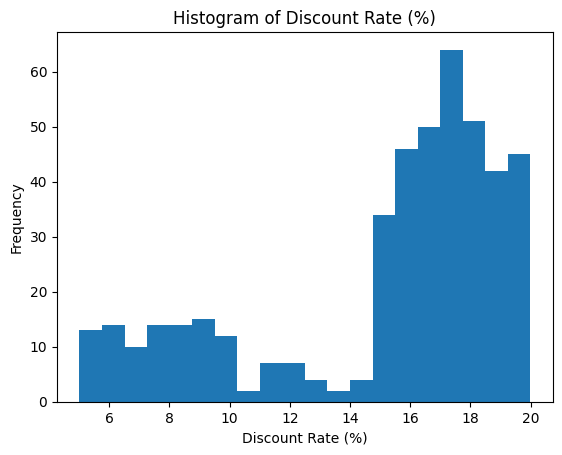

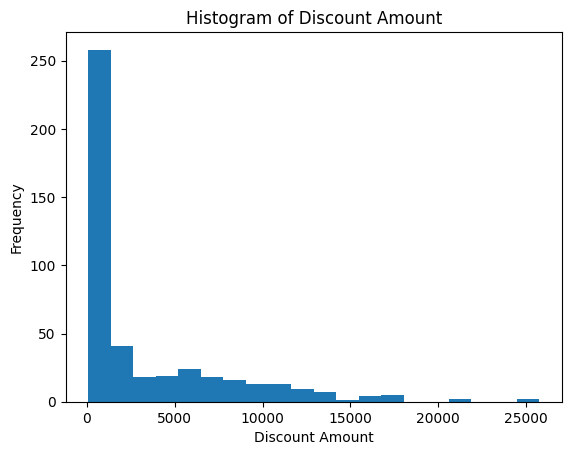

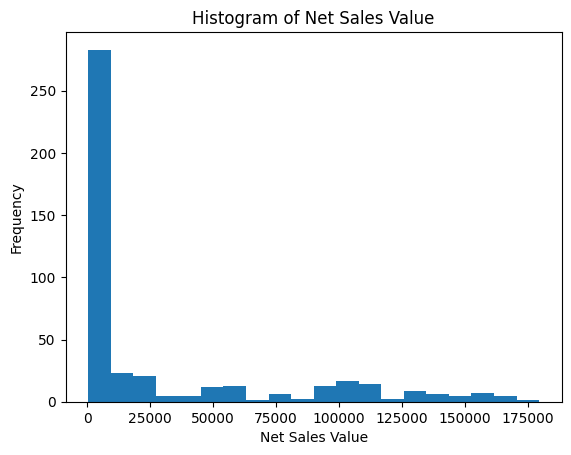

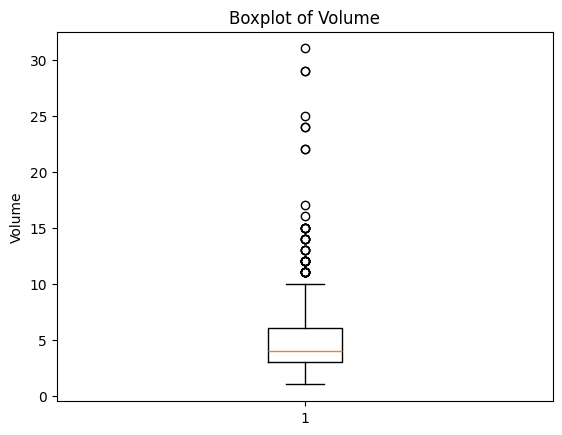

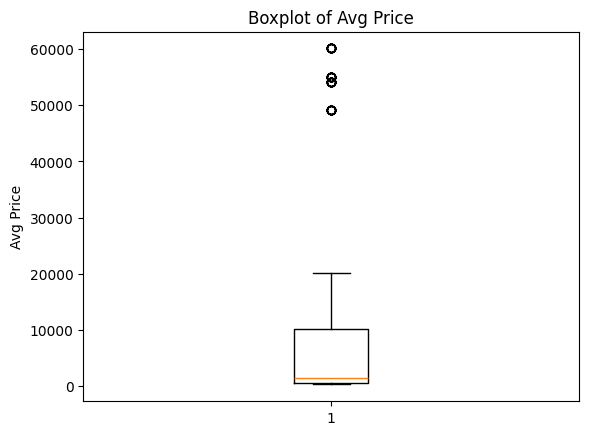

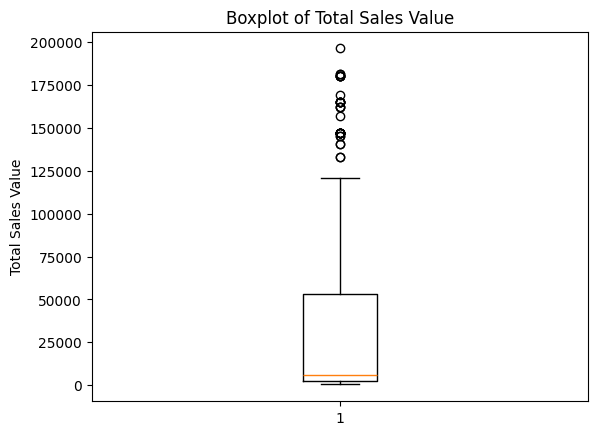

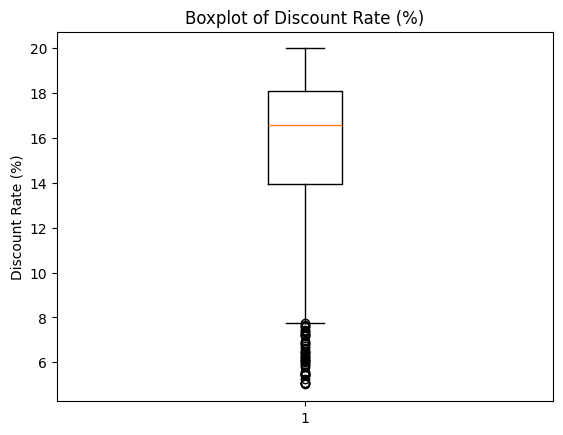

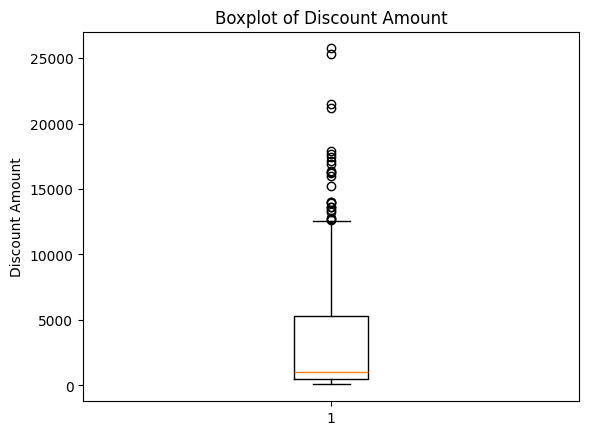

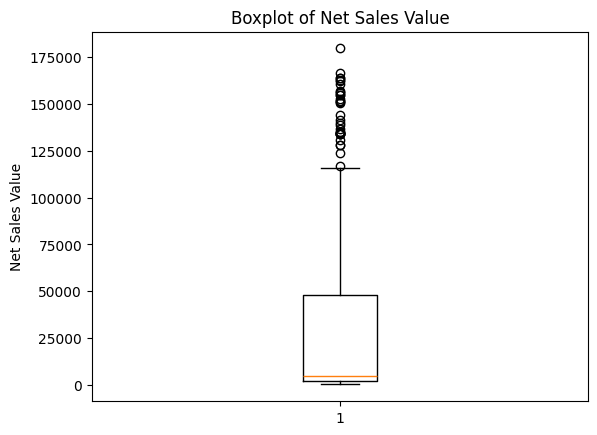

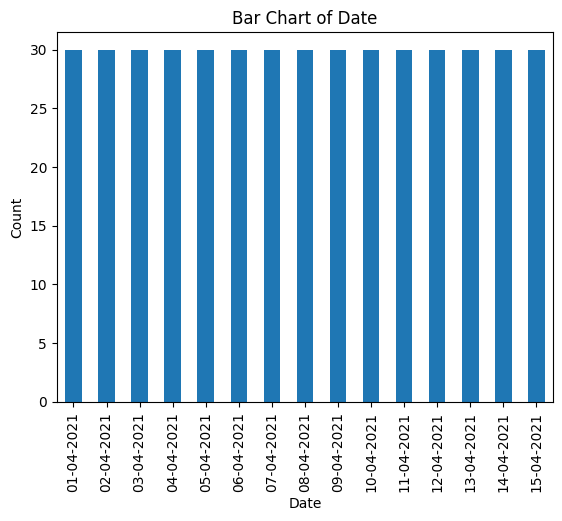

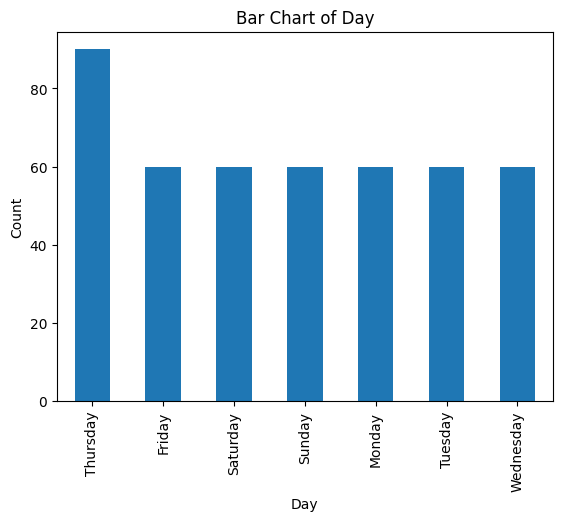

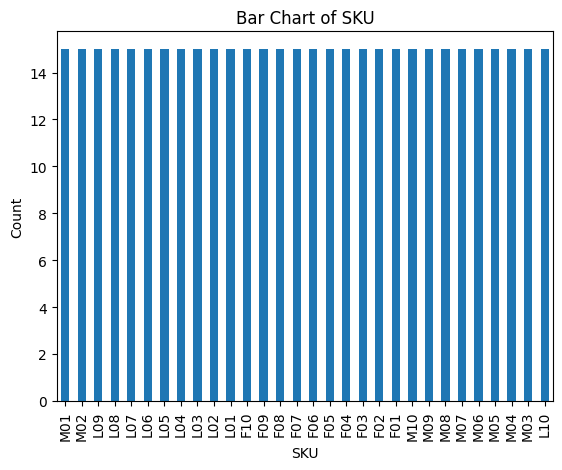

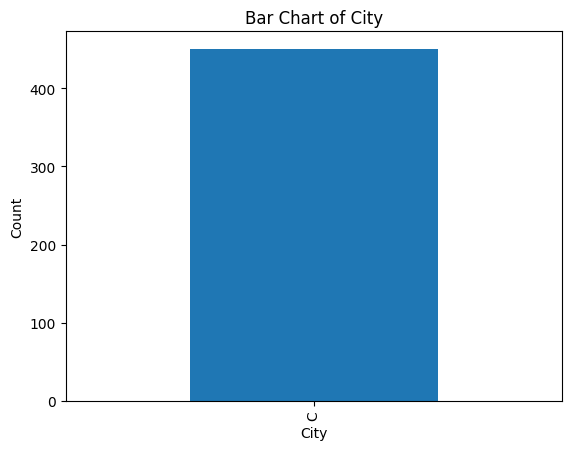

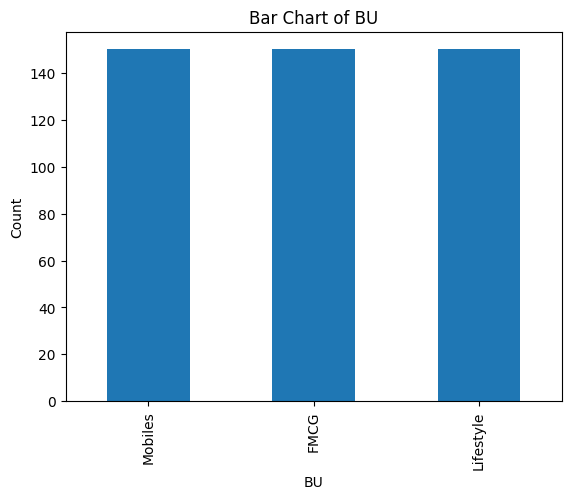

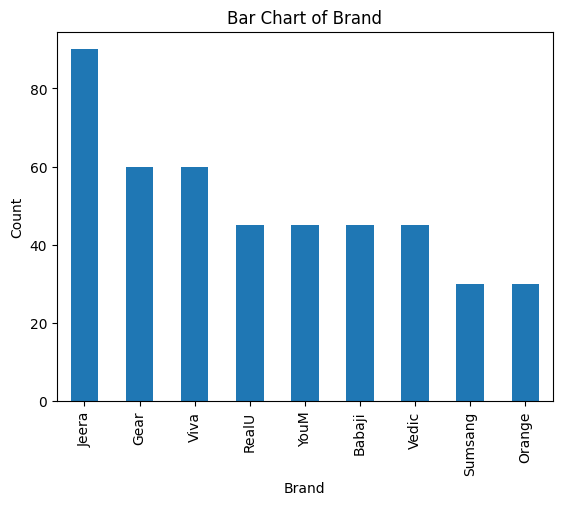

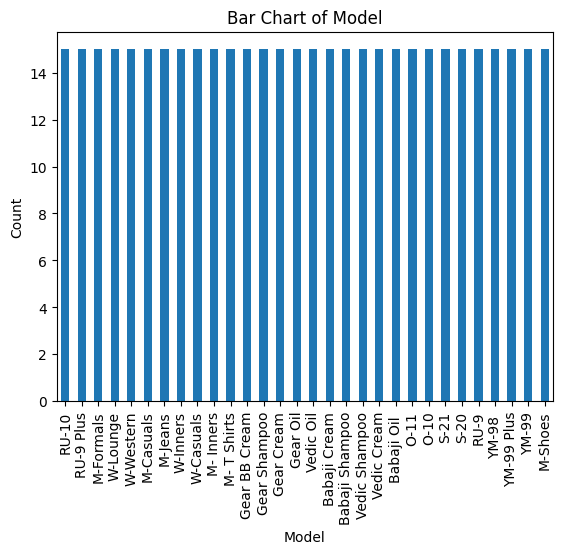


Missing Values:
Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

Data preprocessing completed.
Final dataset shape: (450, 13)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load the Dataset
# -----------------------------
df = pd.read_csv("sales_data_with_discounts (1).csv")

print("Dataset Preview:")
print(df.head())

# -----------------------------
# 2. Identify Columns
# -----------------------------
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

print("\nNumerical Columns:", list(numerical_cols))
print("Categorical Columns:", list(categorical_cols))

# -----------------------------
# 3. Descriptive Statistics
# -----------------------------
stats = df[numerical_cols].describe().T
stats["median"] = df[numerical_cols].median()
stats["mode"] = df[numerical_cols].mode().iloc[0]

print("\nDescriptive Statistics:")
print(stats)

# -----------------------------
# 4. Histograms for Numerical Columns
# -----------------------------
for col in numerical_cols:
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# -----------------------------
# 5. Boxplots for Numerical Columns
# -----------------------------
for col in numerical_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

# -----------------------------
# 6. Bar Charts for Categorical Columns
# -----------------------------
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# -----------------------------
# 7. Basic Data Preprocessing
# -----------------------------

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill numerical missing values with mean (if any)
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Remove duplicate rows
df = df.drop_duplicates()

print("\nData preprocessing completed.")
print("Final dataset shape:", df.shape)
